---

<img src="../images/anchormen-logo.png" width="500">

---



# Exercise: choropleth map of World Bank data

## Libraries and settings

In [1]:
# Libraries
import world_bank_data as wb
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# Settings
%matplotlib inline
pd.options.mode.chained_assignment = None

## Load country dataset from geopandas into a geodataframe

Use the default dataset that is already available in geopandas.

In [2]:
# Load datasets
gdf_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Explore the geodataframe

In [3]:
gdf_countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


## Obtaining World Bank data

We are going to use data from the World Bank on the following development indicator: **Forest area (% of land area)**.

Use the world-bank-data Python API (https://pypi.org/project/world-bank-data/) to retrieve data for indicator `AG.LND.FRST.ZS` for 2012. Make sure that a variable with country code is available in your data (so that we can merge it with the `gdf_countries dataset` later).

Alternatively, download the data manually from http://api.worldbank.org/v2/en/indicator/AG.LND.FRST.ZS?downloadformat=csv (requires unzipping and a bit of selecting).

In [4]:
# Retrieve using world-bank-data Python API
df_forest = wb.get_series('AG.LND.FRST.ZS', id_or_value='id', date='2012') \
    .reset_index() \
    .rename({'AG.LND.FRST.ZS': 'Forest Area (%)'}, axis='columns')

df_forest.head()

,Country,Series,Year,Forest Area (%)
0,ARB,AG.LND.FRST.ZS,2012,1.706957
1,CSS,AG.LND.FRST.ZS,2012,85.210375
2,CEB,AG.LND.FRST.ZS,2012,33.860578
3,EAR,AG.LND.FRST.ZS,2012,22.148057
4,EAS,AG.LND.FRST.ZS,2012,26.231487


In [5]:
# # Manual alternative (note that we will only use the 2012 data)
# datafile = '../geodata/API_AG.LND.FRST.ZS_DS2_en_csv_v2_9944927.csv'
# df_forest = pd.read_csv(datafile, skiprows=4, usecols=['Country Code', '2012'])
# df_forest = df_forest.rename({'Country Code': 'Country', '2012': 'Forest Area (%)'}, axis='columns')

# df_forest.head()

## Choropleth map

We now want to create a choropleth map with percentage of forest area of all matching countries.

### Step 1: merge the indicator data into the geodataframe with country geometries

In [6]:
gdf_forest = gdf_countries.merge(df_forest, left_on='iso_a3', right_on='Country', how='left')

### Step 2: now create a choropleth map, as you have seen in the geopandas presentation
Note: including NaN values may cause incorrect color representations, use fillna() as a solution for now.

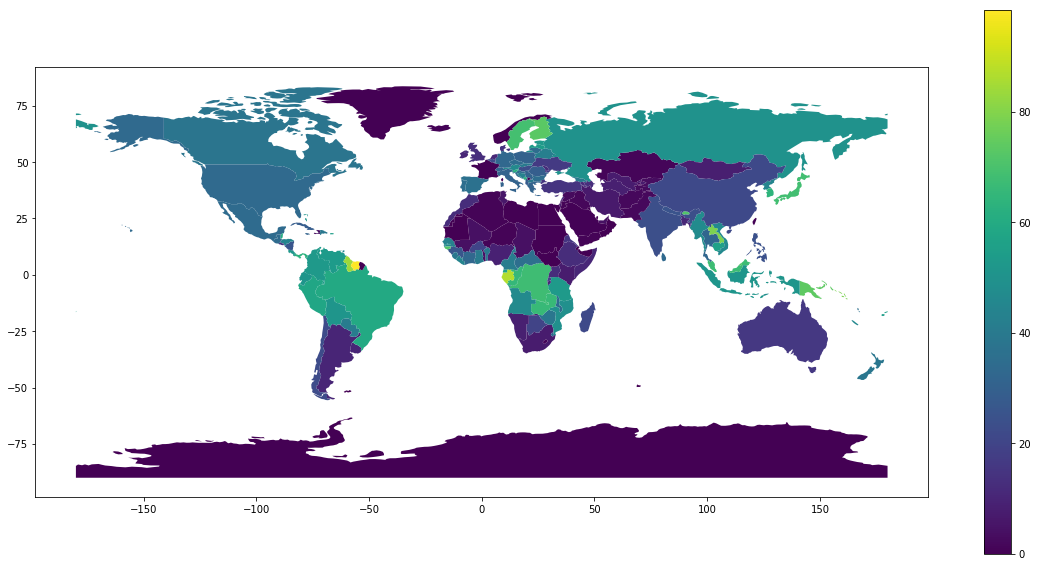

In [7]:
gdf_forest.fillna({'Forest Area (%)':0}).plot(column='Forest Area (%)', legend=True, figsize=(20,10))

### Step 3: adjust the plot to your liking

- You might experiment with colormaps, the figure size, adding a legend, title, removing axes, maybe even adding country labels?
- What happens with countries that have NaN values in the variable you want to plot?

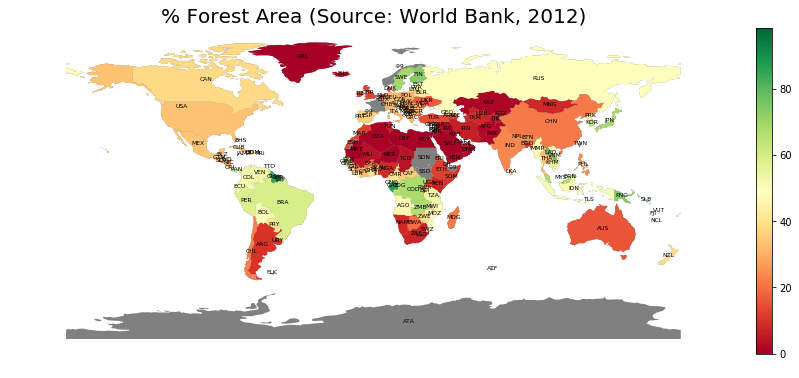

In [8]:
# Set axes and title
fig, ax = plt.subplots(figsize=(16,6), subplot_kw={'aspect':'equal'})
ax.set_axis_off()
ax.set_title('% Forest Area (Source: World Bank, 2012)', size = 20)

# Plot countries in grey background
gdf_forest.plot(ax=ax, color='grey')

# Choropleth map of Forest Area (missing value countries not plotted)
gdf_forest[~gdf_forest['Forest Area (%)'].isna()].plot(
    ax=ax, column='Forest Area (%)', cmap='RdYlGn', legend=True)

# Annotate with country labels
gdf_countries.apply(
    lambda x: ax.annotate(s=x.iso_a3, xy=x.geometry.centroid.coords[0], ha='center', size=6), 
    axis=1);

plt.show()

## Optional: check with your fellow students how they did the exercise